In [21]:
import matplotlib.pyplot as plt
import torch
import sys
sys.path.append("../")
from cdatasets import CutUltrasoundDataset, UltrasoundDataset
from nets import unet, dense

In [22]:
# ds = CutUltrasoundDataset()
ds = UltrasoundDataset()


def view_output_img(img):
    img = img.reshape((41, 25))
    plt.imshow(img)

In [23]:
model = unet.Net3d_1().to("cpu")
model_path = "/home/shared/armeet/ultrasound/models/unet-3d-1_01-09-2024_11:43:11/cp-24.pt"
model.load_state_dict(torch.load(model_path, map_location="cpu"))
model.eval()

Net3d_1(
  (avg): AvgPool3d(kernel_size=(4, 1, 1), stride=(4, 1, 1), padding=0)
  (e1): encoder3d_block(
    (conv): conv3d_block(
      (c1): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=same)
      (bn1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (c2): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=same)
      (bn2): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (pool): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (e2): encoder3d_block(
    (conv): conv3d_block(
      (c1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=same)
      (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (c2): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=same)
      (bn2): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [36]:
def compare(idx):
    fig, axes = plt.subplots(1, 2)

    x, y = ds[idx]
    x = x[0].unsqueeze(0).unsqueeze(0)
    y = y.unsqueeze(0)
    y_pred = model(x).detach().numpy()

    axes[0].imshow(y.squeeze().reshape((41, 25)))
    axes[0].axis("off")
    axes[0].set_title(f"Ground Truth [{idx}]")

    axes[1].imshow(y_pred.squeeze().reshape((41, 25)))
    axes[1].axis("off")
    axes[1].set_title(f"Prediction [{idx}]")
    fig.show()

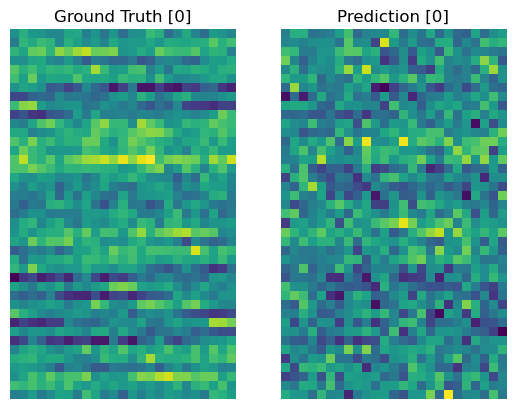

In [29]:
compare(1)

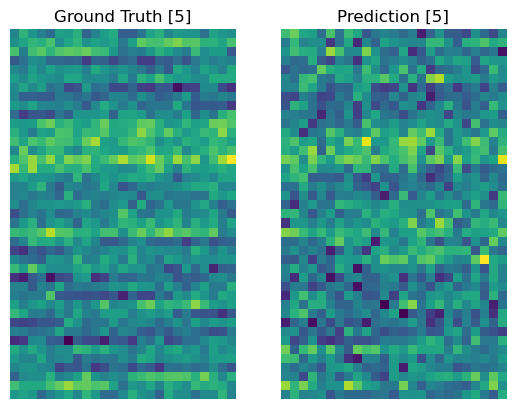

In [26]:
compare(5)

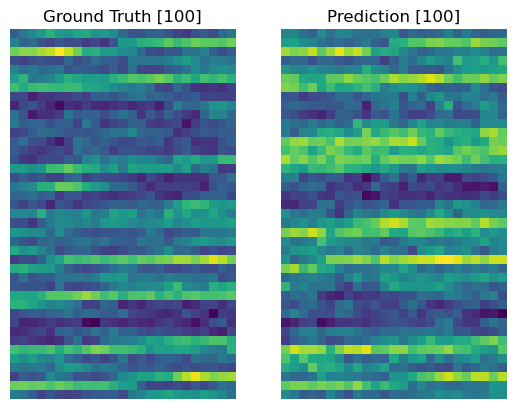

In [27]:
compare(100)

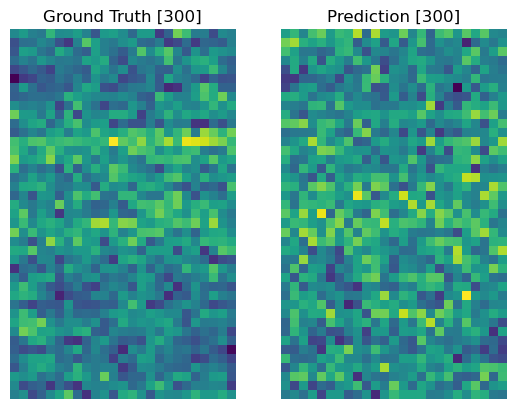

In [28]:
compare(300)

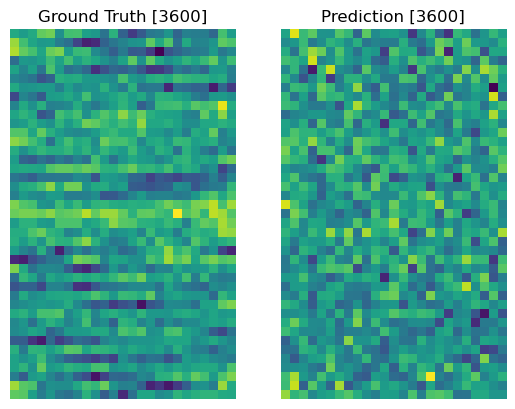

In [12]:
compare(3600)